#Stock Market Analysis And Forecasting
A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment in the stock market is most often done via stockbrokerages and electronic trading platforms. Investment is usually made with an investment strategy in mind.

The task of stock prediction has always been a challenging
problem for statistics experts and
nance. The main reason
behind this prediction is buying stocks that are likely to
increase in price and then selling stocks that are probably
to fall. Generally, there are two ways for stock market prediction.
Fundamental analysis is one of them and relies on a
company's technique and fundamental information like market position, expenses and annual growth rates. The second
one is the technical analysis method, which concentrates on
previous stock prices and values.

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

#Dataset
 1. Google
 2. Microsoft
 3. IBM
 4. Amazon
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Analysis

We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our datasets. Then we compare the "High" and "Close" of each datasets. At last, we will find the trend and seasonality in the dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
google = pd.read_csv('/content/drive/MyDrive/SGP/Datasets/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [ ]:
microsoft = pd.read_csv('/content/drive/MyDrive/SGP/Datasets/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon = pd.read_csv('/content/drive/MyDrive/SGP/Datasets/AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
ibm = pd.read_csv('/content/drive/MyDrive/SGP/Datasets/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

In [ ]:
google.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


After describing the google dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [ ]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [ ]:
google.info

<bound method DataFrame.info of                Open     High      Low    Close    Volume   Name
Date                                                           
2006-01-03   211.47   218.05   209.32   217.83  13137450  GOOGL
2006-01-04   222.17   224.70   220.09   222.84  15292353  GOOGL
2006-01-05   223.22   226.00   220.97   225.85  10815661  GOOGL
2006-01-06   228.66   235.49   226.85   233.06  17759521  GOOGL
2006-01-09   233.44   236.94   230.70   233.68  12795837  GOOGL
...             ...      ...      ...      ...       ...    ...
2017-12-22  1070.00  1071.72  1067.64  1068.86    889446  GOOGL
2017-12-26  1068.64  1068.86  1058.64  1065.85    918767  GOOGL
2017-12-27  1066.60  1068.27  1058.38  1060.20   1116203  GOOGL
2017-12-28  1062.25  1064.84  1053.38  1055.95    994249  GOOGL
2017-12-29  1055.49  1058.05  1052.70  1053.40   1180340  GOOGL

[3019 rows x 6 columns]>

In [ ]:
google.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [ ]:
fig = px.histogram(google,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(google,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(google,
                 x='Open',
                 y='Close',

                 opacity=0.8,

                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

There is a very high correlation between "Open" and "Close". As we can see from the scatter plot.

In [ ]:
# Assuming the column with string values is named 'Symbol'
numeric_google = google.select_dtypes(include=['number'])  # Select only numeric columns

# Calculate the correlation matrix on the numeric data
correlation_matrix = numeric_google.corr()

print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.999894  0.999841  0.999742 -0.443155
High    0.999894  1.000000  0.999827  0.999866 -0.440717
Low     0.999841  0.999827  1.000000  0.999896 -0.447781
Close   0.999742  0.999866  0.999896  1.000000 -0.444590
Volume -0.443155 -0.440717 -0.447781 -0.444590  1.000000


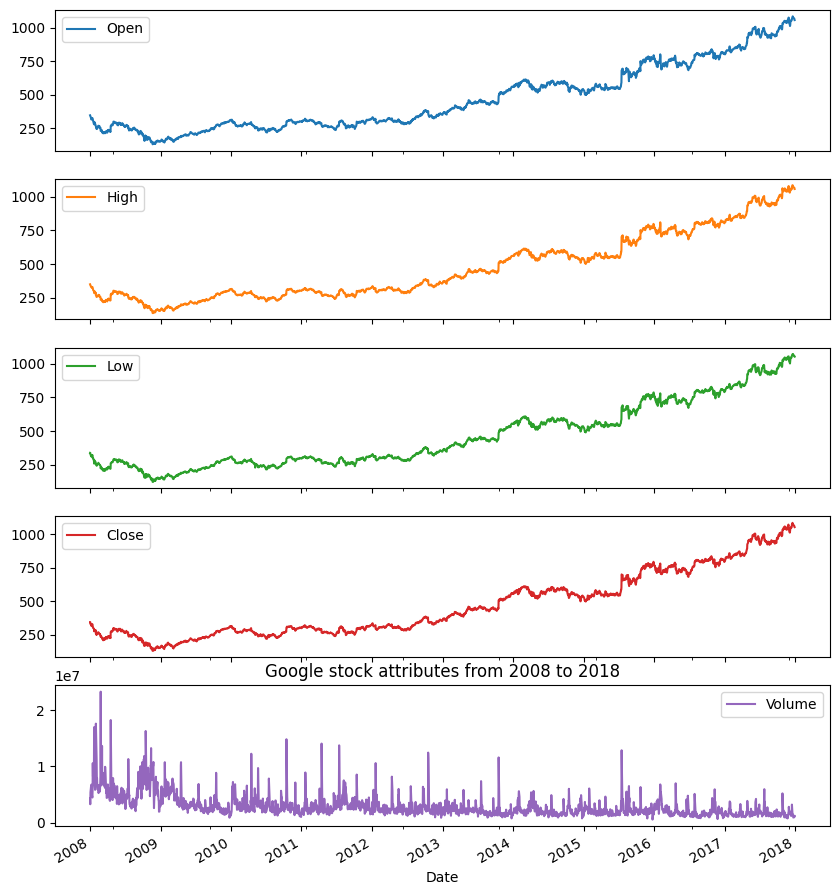

In [ ]:
google['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

###High Plot

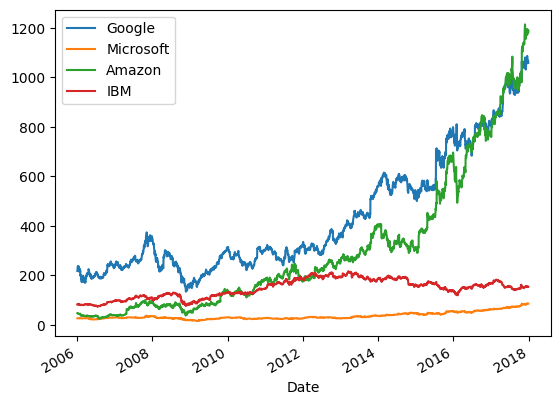

In [ ]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()

As we can see here Microsoft's "High" value is very slowly increasing straight line. IBM's "High" value and Amazon's "High" value started from the approx same stage, even Amazon's "High" value was a bit lower but after 2012 Amazon's "High" value started to exponentially increase and slight drop for IBM's "High" value. Since 2016 there is a high fight going between Google's "High" value and Amazon's "High" value at 2018 Amazon's "High" value also beat Google's "High" value.

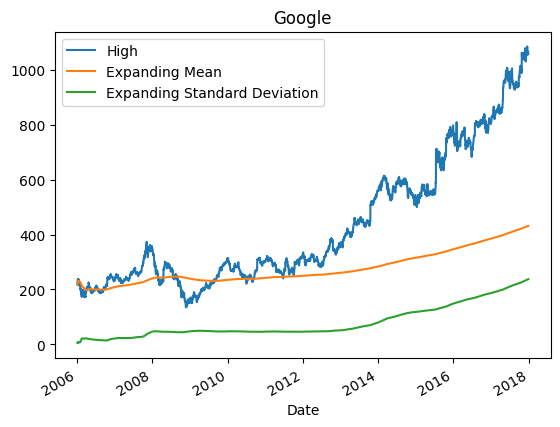

In [ ]:
# Expanding window functions
google_mean = google.High.expanding().mean()
google_std = google.High.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

Same for Google data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. But it was not an as huge loss as Amazon.

##Here we can see every company faced a loss in 2009, maybe that's because of the economic slowdown.

###Close

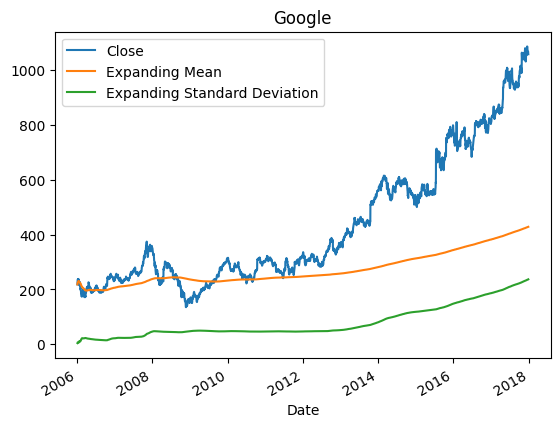

In [ ]:
# Expanding window functions
google_mean = google.Close.expanding().mean()
google_std = google.Close.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

In [ ]:
from pylab import rcParams
import statsmodels.api as sm

##Trend and Seasonality

Google Data

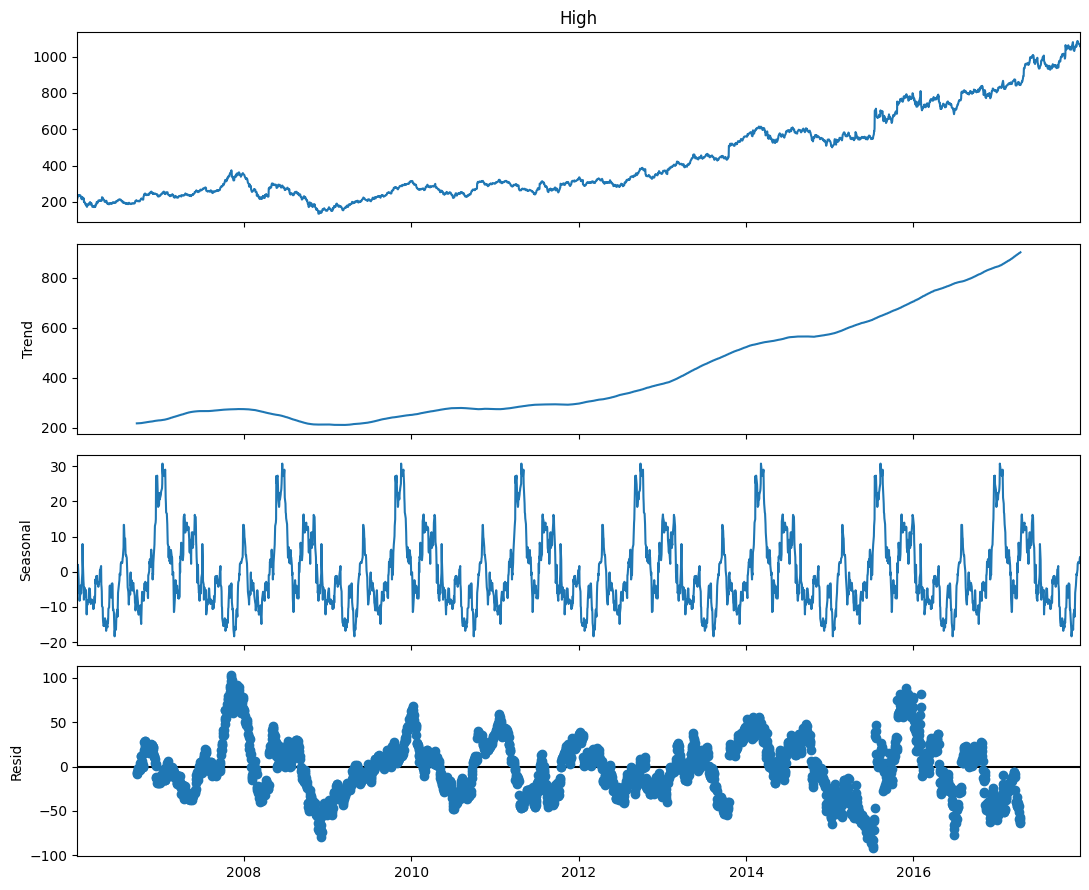

In [ ]:
# Now, for decomposition...
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 11, 9
# Replace 'freq' with 'period'
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"], period=360) # The frequency is annual
figure = decomposed_google_volume.plot()
plt.show()

There is a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

###Close

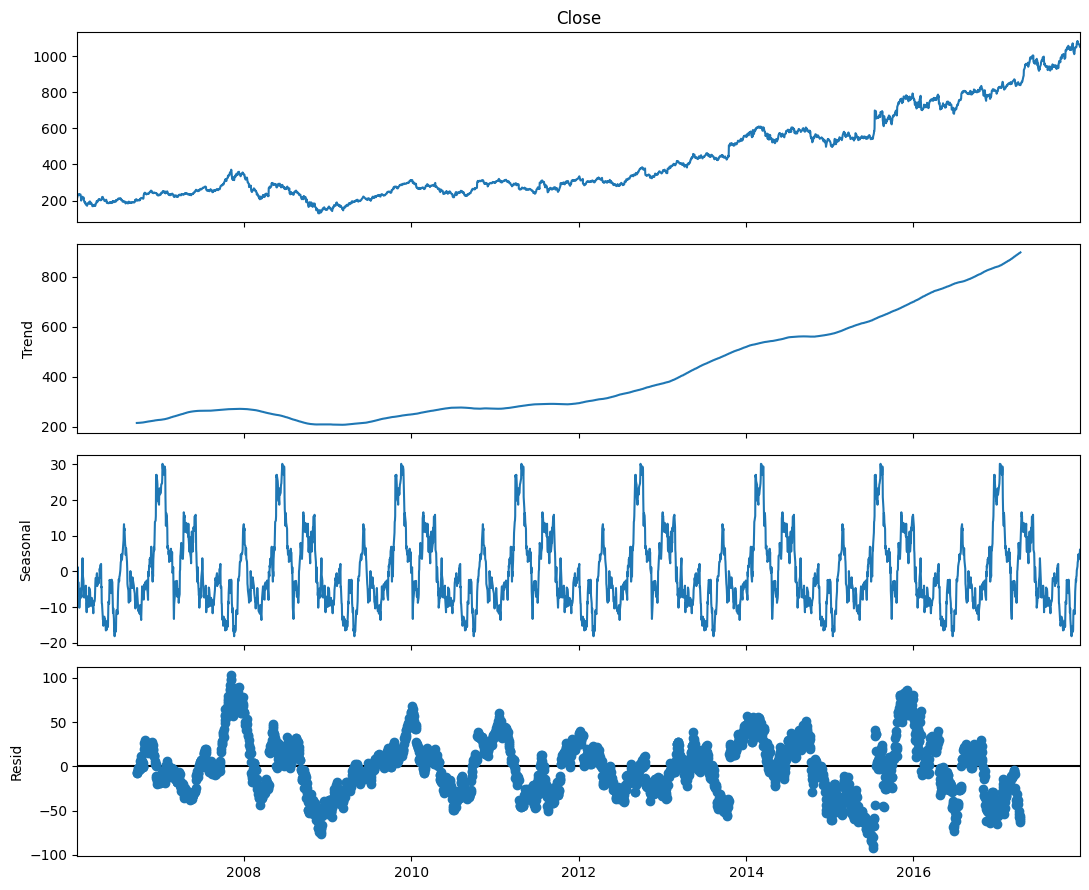

In [ ]:
# Now, for decomposition...
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 11, 9
# Replace 'freq' with 'period'
decomposed_google_volume = sm.tsa.seasonal_decompose(google["Close"], period=360) # The frequency is annual
figure = decomposed_google_volume.plot()
plt.show()

#Prediction

##Time Series Forecasting:
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.


#GRU Model:
Gated recurrent unit  is essentially a simplified LSTM. It has
the exact same role in the network. The main difference is in the number of
gates and weights — GRU is somewhat simpler. It has 2 gates. Since it does
not have an output gate, there is no control over the memory content. The
update gate controls the information flow from the previous activation, and
the addition of new information as well, while the reset gate is inserted
into the candidate activation.



<img src='https://d2l.ai/_images/gru-1.svg' />


By using GRU time series forecasting we will forcaste and check.

In [ ]:
filepath = r'/content/drive/MyDrive/SGP/Datasets/GOOGL_2006-01-01_to_2018-01-01.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


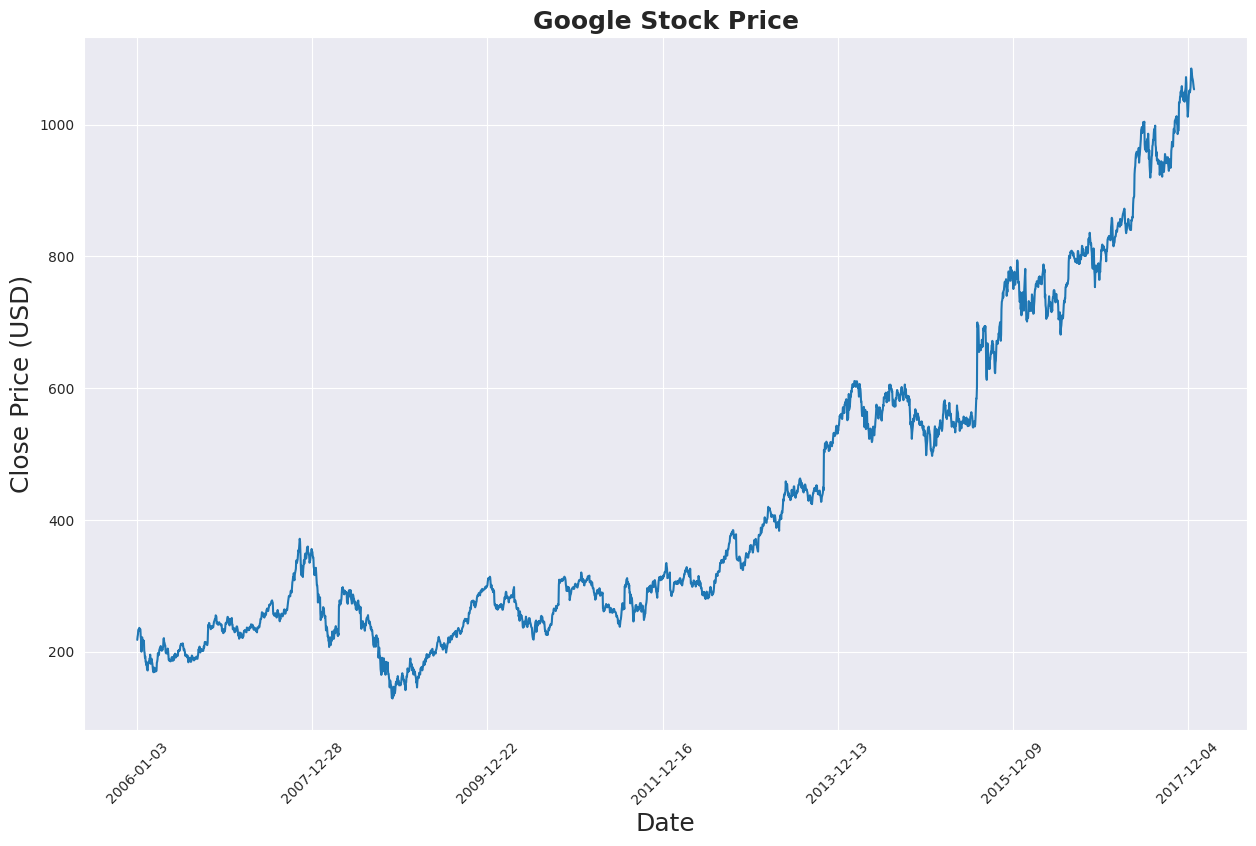

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_google[['Close']])
plt.xticks(range(0,data_google.shape[0],500),data_google['Date'].loc[::500],rotation=45)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SGP/Datasets/GOOGL_2006-01-01_to_2018-01-01.csv')

# Now you can proceed with your code
price_google = data[['Close']]
price_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [ ]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [ ]:
import torch.nn as nn # Import the necessary module

class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_google['Close'] = scaler.fit_transform(price_google['Close'].values.reshape(-1,1))

<ipython-input-23-7909ce3880b7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_google, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [ ]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.722836434841156
Epoch  1 MSE:  0.3172265589237213
Epoch  2 MSE:  0.08671684563159943
Epoch  3 MSE:  0.09454743564128876
Epoch  4 MSE:  0.1296597719192505
Epoch  5 MSE:  0.06624890863895416
Epoch  6 MSE:  0.04662968963384628
Epoch  7 MSE:  0.061223484575748444
Epoch  8 MSE:  0.07577235996723175
Epoch  9 MSE:  0.07723736017942429
Epoch  10 MSE:  0.06692145764827728
Epoch  11 MSE:  0.05135200172662735
Epoch  12 MSE:  0.03805648908019066
Epoch  13 MSE:  0.032786689698696136
Epoch  14 MSE:  0.035881489515304565
Epoch  15 MSE:  0.04028414189815521
Epoch  16 MSE:  0.03757082298398018
Epoch  17 MSE:  0.027504049241542816
Epoch  18 MSE:  0.01715921051800251
Epoch  19 MSE:  0.012469535693526268
Epoch  20 MSE:  0.013373514637351036
Epoch  21 MSE:  0.01495268102735281
Epoch  22 MSE:  0.012190268374979496
Epoch  23 MSE:  0.005244766362011433
Epoch  24 MSE:  0.0006334782810881734
Epoch  25 MSE:  0.004358260426670313
Epoch  26 MSE:  0.010642224922776222
Epoch  27 MSE:  0.009383486583

In [ ]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

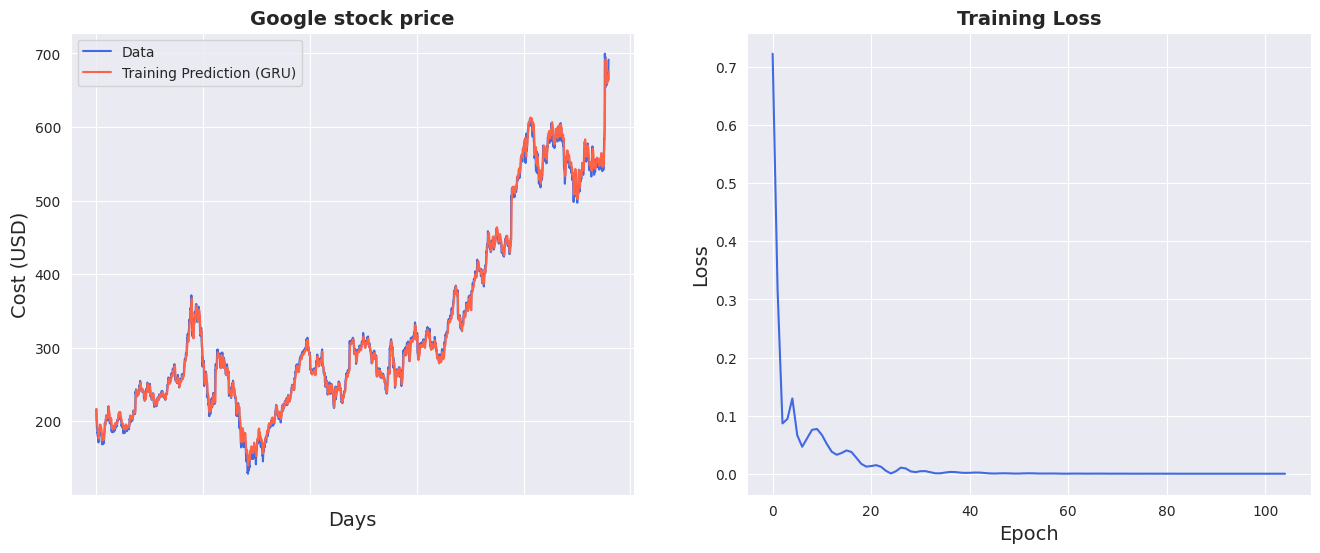

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Google stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [ ]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 6.98 RMSE
Test Score: 40.77 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_google)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_google)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_google)-1, :] = y_test_pred

original = scaler.inverse_transform(price_google['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Google Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

#Online Learning

### Import Necessary Libraries
In this section, we will import all the required libraries for data processing, analysis, and modeling.


In [ ]:
!pip install apscheduler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from apscheduler.schedulers.blocking import BlockingScheduler
from datetime import datetime
import math
from sklearn.metrics import mean_squared_error

###Data Fetching Function
We define a function to fetch stock data for selected companies within a specific date range.

In [ ]:
# Define companies and initial date range
companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT']
start_date = '2024-10-01'  # Start from a recent date for online learning
end_date = '2024-11-23'

# Function to fetch recent data
def fetch_latest_data(companies, start_date, end_date):
    data = {}
    for company in companies:
        data[company] = yf.download(company, start=start_date, end=end_date)
    return data

###GRU Model Definition
Here we define the structure of the GRU (Gated Recurrent Unit) model. It takes in an input, passes it through GRU layers, and outputs a prediction.

In [ ]:
# Define GRU Model
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, hn = self.gru(x, h0.detach())  # Pass through GRU
        out = self.fc(out[:, -1, :])  # Last output for prediction
        return out

###Initialize Model, Loss Function and Optimizer
In this block, we initialize the GRU model, define the loss function (MSE) and set up the optimizer (Adam).

In [ ]:
# Initialize the GRU model
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# Loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

###Online Learning Update Function
This function performs an incremental update of the model using newly fetched data. The model trains with the new data and updates its weight accordingly.

In [ ]:
# Online learning update function
def update_model(model, x_new, y_new, criterion, optimizer):
    model.train()
    y_new_pred = model(x_new.unsqueeze(-1))  # Predict with new data
    loss = criterion(y_new_pred.squeeze(), y_new)
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    return loss.item()

###Data Splitting for Training
We define a helper function to spilt the stock price data into features (x_new) and labels (y_new) for the model to learn from.

In [ ]:
# Data splitting function for new batches
def split_data(stock, lookback):
    data_raw = stock['Close_Scaled'].to_numpy().reshape(-1, 1)  # Close price as a 2D numpy array
    data = []

    # Create sequences of length `lookback`
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data)

    # Ensure the data has the correct shape
    if data.ndim == 3:
        x_new = data[:, :-1, 0]  # Features (all but last element in the sequence)
        y_new = data[:, -1, 0]  # Labels (last element in the sequence)
    else:
        raise ValueError(f"Data did not convert to the expected shape. Current shape: {data.shape}")

    return [x_new, y_new]

###Main Online Learning Loop
In this block, we fetch the initial batch of data and define the online_learning_step function that fetches new data and trains the model incrementally in a simulated online learning environment.

In [ ]:
# Define a lookback period (window size for sequences)
lookback = 20  # You can adjust this as needed

# Function to split the stock data into sequences
def split_data1(stock, lookback):
    data_raw = stock['Close_Scaled'].to_numpy()  # Close price as numpy array
    data = []

    # Create sequences of length 'lookback'
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    # Convert to numpy array and ensure it's 2D
    data = np.array(data)

    if data.ndim == 1:  # If 1D, reshape it to 2D
        data = data.reshape(-1, 1)

    # Calculate train/test split sizes
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size

    # Split into training and testing sets
    x_train = data[:train_set_size, :-1]  # Features
    y_train = data[:train_set_size, -1]   # Target
    x_test = data[train_set_size:, :-1]   # Features for testing
    y_test = data[train_set_size:, -1]    # Target for testing

    return [x_train, y_train, x_test, y_test]

In [ ]:
import torch
import torch.nn as nn
# Import the MSELoss function instead of the class
from torch.nn.functional import mse_loss
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Call the split_data function to get training and testing sets
stock_data =  yf.download('GOOGL', start='2010-01-01', end='2024-10-09')
stock_data['Close_Scaled'] = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))
x_train, y_train, x_test, y_test = split_data1(stock_data, lookback)

# Number of epochs
num_epochs = 105

# Initialize an array to store the loss history
hist = np.zeros(num_epochs)

# Training the model
start_time = datetime.now()

for t in range(num_epochs):
    # Convert x_train to a PyTorch tensor
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)

    y_train_pred = model(x_train_tensor.unsqueeze(-1))
    # Calculate loss using the mse_loss function
    loss = mse_loss(y_train_pred.squeeze(), torch.tensor(y_train, dtype=torch.float32))

    # Save the loss at each epoch
    hist[t] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

training_time = (datetime.now() - start_time).total_seconds()
print(f"Training completed in {training_time} seconds.")

[*********************100%***********************]  1 of 1 completed


Training completed in 23.424544 seconds.


In [ ]:
# Function to save model checkpoints
def save_model_checkpoint(model, epoch, path="model_checkpoints"):
    import os
    if not os.path.exists(path):
        os.makedirs(path)
    model_path = f"{path}/gru_model_epoch_{epoch}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

# Function for an online learning step
def online_learning_step():
    global google, model, scaler
    lookback = 5  # Adjust lookback based on the data

    # Fetch new data (simulated)
    new_data = fetch_latest_data(companies, start_date='2024-10-01', end_date='2024-10-09')

    # Update Google stock dataframe with new data
    new_data_goog = new_data['GOOGL'][['Close']]
    google = pd.concat([google, new_data_goog]).drop_duplicates()

    # Print updated data shape
    print(f"Updated Google Data Shape: {google.shape}")

    # Scale the 'Close' prices and reshape
    google['Close_Scaled'] = scaler.fit_transform(google['Close'].values.reshape(-1, 1)).reshape(-1)

    # Check if enough data points for the lookback window
    if google.shape[0] <= lookback:
        print(f"Not enough data points to create sequences. Got {google.shape[0]}.")
        return

    # Prepare new data for training
    x_new, y_new = split_data(google, lookback)

    # Print shapes of new data
    print(f"x_new Shape: {x_new.shape}, y_new Shape: {y_new.shape}")

    # Convert new data to PyTorch tensors
    x_new = torch.from_numpy(x_new).type(torch.Tensor)
    y_new = torch.from_numpy(y_new).type(torch.Tensor)

    # Train with new data and print loss
    loss = update_model(model, x_new, y_new, criterion, optimizer)
    print(f"Online Learning Step: Loss = {loss}")

    # Save model checkpoint after every step
    save_model_checkpoint(model, epoch=1)  # Increment epoch if needed

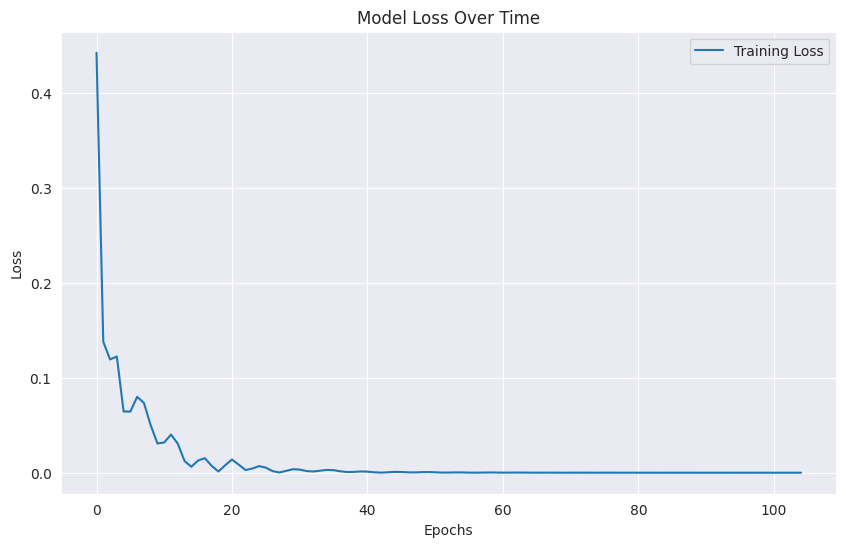

In [ ]:
# Function to plot the loss
def plot_loss(loss_history):
    plt.figure(figsize=(10,6))
    plt.plot(loss_history, label="Training Loss")
    plt.title("Model Loss Over Time")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the loss history
plot_loss(hist)

In [ ]:
# Start the scheduler for online learning every minute
from apscheduler.schedulers.blocking import BlockingScheduler

# Scheduler to simulate online learning
scheduler = BlockingScheduler()

# Add the online learning step to run every 10 minute
scheduler.add_job(online_learning_step, 'interval', minutes=1)

# Start the online learning process
scheduler.start()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Updated Google Data Shape: (3024, 7)
x_new Shape: (3019, 4), y_new Shape: (3019,)
Online Learning Step: Loss = nan
Model saved to model_checkpoints/gru_model_epoch_1.pth


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Updated Google Data Shape: (3024, 8)
x_new Shape: (3019, 4), y_new Shape: (3019,)
Online Learning Step: Loss = nan
Model saved to model_checkpoints/gru_model_epoch_1.pth


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Plot the historical closing prices of Google stock
plt.figure(figsize=(14, 7))
plt.plot(google['Close'], label='Historical Close Price', color='blue')

# Step 2: Predict the next day's price
# Reshape to have 1 feature per timestep
last_days = google['Close_Scaled'].values[-lookback:].reshape(-1, 1)
last_days_tensor = torch.from_numpy(last_days).float().unsqueeze(0)  # Add batch dimension
next_day_prediction = model(last_days_tensor).detach().numpy()
next_day_prediction = scaler.inverse_transform(next_day_prediction)  # Inverse scaling
predicted_price = next_day_prediction[0][0]

# Step 3: Prepare data for visualization
last_date = google.index[-1]
predicted_date = last_date + pd.Timedelta(days=1)

# Add the predicted price to the plot
plt.plot(predicted_date, predicted_price, marker='o', color='orange', label='Predicted Price')

# Visualization details
plt.title('Google Stock Historical Prices and Predicted Price for Tomorrow')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Output the predicted price for tomorrow
print(f"The predicted price for tomorrow is: ${predicted_price:.2f}")

In [ ]:
# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode

# Convert x_test to a PyTorch tensor
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Get model predictions
with torch.no_grad():  # No gradient computation needed during evaluation
    y_test_pred = model(x_test_tensor.unsqueeze(-1)).squeeze()

# Calculate metrics
y_test_pred_numpy = y_test_pred.numpy()
y_test_numpy = y_test  # Assuming y_test is already a NumPy array

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test_numpy - y_test_pred_numpy))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = np.mean((y_test_numpy - y_test_pred_numpy) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Absolute Error (MAE): 0.3570
Mean Squared Error (MSE): 0.1634


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.8 MB/s eta 0:00:00


2024-11-09 16:46:38.641 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-09 16:46:38.874 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-09 16:46:38.876 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-09 16:46:38.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-09 16:46:38.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-09 16:46:38.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-09 16:46:38.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-09 16:46:38.956 Thread 'MainThread': mi

DeltaGenerator()

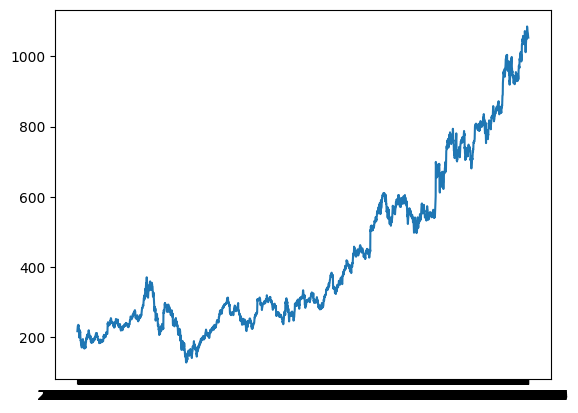

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title("Stock Market Analysis and Forecasting")

# Load and display datasets
google = pd.read_csv("/content/drive/MyDrive/SGP/Datasets/GOOGL_2006-01-01_to_2018-01-01.csv")
st.write("Google Dataset", google.head())

# Example Visualization
st.write("Google Stock Price Over Time")
plt.plot(google['Date'], google['Close'])
st.pyplot(plt)